In [1]:
# Answer a few questions before diving into the problem before  joining the features and response
# What do the features actually mean?
# Why don't the unique IDs of labels and telematic data match up?
# What does accuracy mean?
# What does second mean?
# What does acceleration and gyro actually mean?

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv("../grab-ai-safety-data/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df1 = pd.read_csv("../grab-ai-safety-data/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df2 = pd.read_csv("../grab-ai-safety-data/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df3 = pd.read_csv("../grab-ai-safety-data/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df4 = pd.read_csv("../grab-ai-safety-data/features/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df5 = pd.read_csv("../grab-ai-safety-data/features/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df6 = pd.read_csv("../grab-ai-safety-data/features/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df7 = pd.read_csv("../grab-ai-safety-data/features/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df8 = pd.read_csv("../grab-ai-safety-data/features/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df9 = pd.read_csv("../grab-ai-safety-data/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
response = pd.read_csv("../grab-ai-safety-data/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")

In [4]:
df_features = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=0)

In [5]:
df = pd.merge(
    df_features,
    response,
    how="left",
    on="bookingID"
)

In [71]:
df.loc[df["label"] == 0]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,gyro_x_abs,gyro_y_abs,gyro_z_abs
1,1099511627891,3.000,311.000000,0.452518,9.273026,3.098191,0.005382,0.002155,-0.001436,66.0,0.340365,0,0.005382,0.002155,0.001436
2,962072674446,10.000,142.807999,0.018542,-8.041156,-4.960114,0.004223,-0.014875,0.007397,1552.0,2.050000,0,0.004223,0.014875,0.007397
3,1142461300867,8.000,171.205292,-0.290698,-8.295367,-3.049042,0.033618,0.046224,0.030559,277.0,17.608448,0,0.033618,0.046224,0.030559
4,412316860548,19.379,0.000000,0.675613,8.846130,1.852508,-0.008652,0.003693,0.001160,148.0,0.000000,0,0.008652,0.003693,0.001160
5,1176821039217,4.864,277.000000,0.268151,9.011775,1.781286,0.000192,0.003718,-0.011833,56.0,1.053419,0,0.000192,0.003718,0.011833
6,738734375093,16.000,290.901459,0.881815,-9.852637,1.785162,0.076716,0.012401,-0.022666,641.0,2.596329,0,0.076716,0.012401,0.022666
7,755914244124,9.648,353.000000,-1.690124,9.524643,2.555557,-0.346084,-0.419119,0.118720,115.0,5.090000,0,0.346084,0.419119,0.118720
9,584115552266,4.000,199.000000,-6.914666,2.839610,6.498062,0.011221,-0.035768,0.039490,1044.0,26.240519,0,0.011221,0.035768,0.039490
10,146028888161,5.000,326.119141,-1.149185,-9.772635,-1.841537,0.015651,-0.100988,0.025474,292.0,9.418019,0,0.015651,0.100988,0.025474
11,1554778161292,6.000,332.000000,-1.972882,9.711179,1.735849,0.011042,0.158532,-0.011837,72.0,12.075355,0,0.011042,0.158532,0.011837


In [69]:
# Let's look at a case where the booking is in fact dangerous
booking_1_1 = df.loc[df["bookingID"] == 1709396983813].sort_values("second")

In [ ]:
booking_1 = df.loc[df["bookingID"] == 1194000908341].sort_values("second")

In [55]:
booking_0 = df.loc[df["bookingID"] == 	1099511627891].sort_values("second")

In [72]:
booking_0_1 = df.loc[df["bookingID"] == 	1503238553682].sort_values("second")

## Plotting speed and time

The idea is that if the change in speed is very big, then it could signify jamming on the brakes?

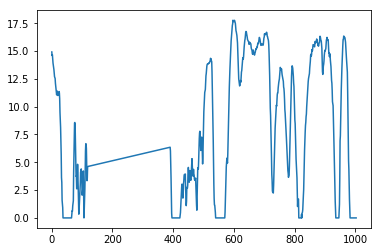

In [67]:
plt.plot(booking_0["second"], booking_0["Speed"])

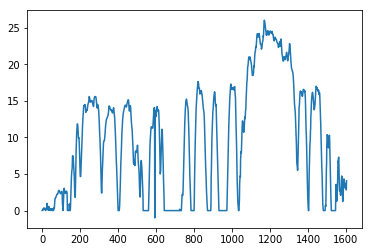

In [73]:
plt.plot(booking_0_1["second"], booking_0_1["Speed"])

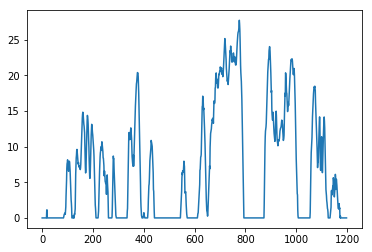

In [66]:
plt.plot(booking_1["second"], booking_1["Speed"])

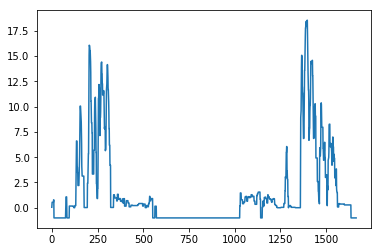

In [70]:
plt.plot(booking_1_1["second"], booking_1_1["Speed"])

In [ ]:
# Average dangerous and non-dangerous categories to see if there is any differences

In [53]:
df["gyro_x_abs"] = np.abs(df["gyro_x"])
df["gyro_y_abs"] = np.abs(df["gyro_y"])
df["gyro_z_abs"] = np.abs(df["gyro_z"])

df["acceleration_x_abs"] = np.abs(df["acceleration_x"])
df["acceleration_y_abs"] = np.abs(df["acceleration_y"])
df["acceleration_z_abs"] = np.abs(df["acceleration_z"])


In [ ]:
df_id = df.groupby(["bookingID"]).agg({
    "second": "max",
    "Bearing": "max",
    "Speed": "mean",
    "gyro_x_abs": "max",
    "gyro_y_abs": "max",
    "gyro_z_abs": "max",
    "label":  "max"
}).groupby("label").agg({
    "mean"
})

In [54]:
df_id

,second,Bearing,Speed,gyro_x_abs,gyro_y_abs,gyro_z_abs
,mean,mean,mean,mean,mean,mean
label,,,,,,
0,265721.207147,342.165025,8.606848,0.692275,1.114589,0.560030
1,1173.874625,351.968701,7.885058,1.056035,1.599953,0.962642


In [52]:
## So many 0 is the more dangerous category because it has higher speed and longer trips